# [0] 모듈, 데이터 로드

In [81]:
# 데이터분석용
import pandas as pd
import numpy as np
import os
import time
from IPython.display import Image
import glob
import seaborn as sns

# 시각화
import matplotlib.pyplot as plt

# 머신러닝
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
import xgboost
import catboost
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

%matplotlib inline

In [82]:
# test Data
test_data = pd.read_csv('C:/Users/NT551XCJ/Desktop/py_projects/ASAC_ML_Project/최종_테스트데이터.csv', encoding = 'utf-8')
test_data.head(5)

,DATA_CRTR_YM,LT_UNQ_NO,STDG_EMD_CD,INDUSTRY_CD,SLS_GRD,bus_counts,subway_counts,sisul_counts,apt_doors_counts,snp_price_score,...,상권_분기당_건당_금액,맑음_비중,휴일_비중,여/남_생활인구비율,여/남_직장인구비율,여/남_상주인구비율,직장인구비율,가구당인구수,생활인구비율,상권집객력
0,202301,1111010100100480000,11110101,A01,NaN,11.0,0.0,2.0,0.0,72.82875,...,33934.531391,7.0,0.363636,0.992080,1.039967,1.0,0.291335,0.462580,66.089332,0.000109
1,202302,1111010100100480000,11110101,A01,NaN,11.0,0.0,2.0,0.0,65.29875,...,33934.531391,4.0,0.476190,0.992080,1.039967,1.0,0.291335,0.462580,66.089332,0.000109
2,202301,1111010100100690000,11110101,A01,NaN,11.0,0.0,2.0,0.0,72.82875,...,33934.531391,7.0,0.363636,0.992080,1.039967,1.0,0.291335,0.462580,66.089332,0.000109
3,202302,1111010100100690000,11110101,A01,NaN,11.0,0.0,2.0,0.0,65.29875,...,33934.531391,4.0,0.476190,0.992080,1.039967,1.0,0.291335,0.462580,66.089332,0.000109
4,202301,1111010100100720000,11110101,A14,NaN,9.0,0.0,2.0,0.0,65.15000,...,40237.912436,7.0,0.363636,0.992715,1.365854,1.0,0.208378,0.498389,67.864662,0.000142


In [83]:
# Train Data
data = pd.read_csv('C:/Users/NT551XCJ/Desktop/py_projects/ASAC_ML_Project/피처엔지니어링_done.csv', encoding = 'utf-8')
data.head(5)

,DATA_CRTR_YM,LT_UNQ_NO,STDG_EMD_CD,INDUSTRY_CD,SLS_GRD,bus_counts,subway_counts,sisul_counts,apt_doors_counts,snp_price_score,...,상권_분기당_건당_금액,맑음_비중,휴일_비중,여/남_생활인구비율,여/남_직장인구비율,여/남_상주인구비율,직장인구비율,가구당인구수,생활인구비율,상권집객력
0,202201,1111010100100030100,11110101,A03,4,8,0,4,0,69.86,...,25587.810288,7.0,0.55,0.923951,0.692593,1.0,0.311096,0.454050,56.230088,0.000121
1,202201,1111010100100480000,11110101,A01,2,8,0,2,0,73.91,...,17920.185978,7.0,0.55,0.982700,0.398936,1.0,0.488848,0.377323,57.304833,0.000032
2,202201,1111010100100590001,11110101,A11,3,8,0,2,0,64.25,...,17920.185978,7.0,0.55,0.982700,0.398936,1.0,0.488848,0.377323,57.304833,0.000032
3,202201,1111010100100590005,11110101,A03,2,8,0,2,0,71.80,...,17920.185978,7.0,0.55,0.982700,0.398936,1.0,0.488848,0.377323,57.304833,0.000032
4,202201,1111010100100690000,11110101,A01,2,8,0,2,0,79.38,...,32412.517375,7.0,0.55,0.890593,1.365854,1.0,0.208378,0.498389,55.609023,0.000174


In [84]:
data.shape, test.shape

((1156040, 90), (20000, 88))

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156040 entries, 0 to 1156039
Data columns (total 90 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   DATA_CRTR_YM      1156040 non-null  int64  
 1   LT_UNQ_NO         1156040 non-null  int64  
 2   STDG_EMD_CD       1156040 non-null  int64  
 3   INDUSTRY_CD       1156040 non-null  object 
 4   SLS_GRD           1156040 non-null  int64  
 5   bus_counts        1156040 non-null  int64  
 6   subway_counts     1156040 non-null  int64  
 7   sisul_counts      1156040 non-null  int64  
 8   apt_doors_counts  1156040 non-null  int64  
 9   snp_price_score   1156040 non-null  float64
 10  fpop_score        1156040 non-null  float64
 11  sns_score         1156040 non-null  float64
 12  공시지가              1156040 non-null  float64
 13  횡단보도갯수            1156040 non-null  float64
 14  이산화질소농도(ppm)      1156040 non-null  float64
 15  오존농도(ppm)         1156040 non-null  float64
 16  

In [86]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 88 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATA_CRTR_YM      20000 non-null  int64  
 1   LT_UNQ_NO         20000 non-null  int64  
 2   STDG_EMD_CD       20000 non-null  int64  
 3   INDUSTRY_CD       20000 non-null  object 
 4   bus_counts        20000 non-null  float64
 5   subway_counts     20000 non-null  float64
 6   sisul_counts      20000 non-null  float64
 7   apt_doors_counts  20000 non-null  float64
 8   snp_price_score   20000 non-null  float64
 9   fpop_score        20000 non-null  float64
 10  sns_score         20000 non-null  float64
 11  공시지가              15016 non-null  float64
 12  횡단보도갯수            20000 non-null  float64
 13  이산화질소농도(ppm)      20000 non-null  float64
 14  오존농도(ppm)         20000 non-null  float64
 15  미세먼지              20000 non-null  float64
 16  운영_영업_개월_평균       20000 non-null  float6

In [87]:
# target, data 분리
data_target = data['SLS_GRD']
data = data.drop(['SLS_GRD','상권_변화_지표_명','여/남_상주인구비율'], axis = 1)

test_data_target = test_data['SLS_GRD']
test_data = test_data.drop(['SLS_GRD','여/남_상주인구비율'], axis = 1)

In [89]:
# Train과 최종 산출물 데이터 Column 일치 여부 확인
data.shape, test_data.shape, np.sum(data.columns == test_data.columns) # 문제 없음

((1156040, 87), (20000, 87), 87)

# [1] 인코딩

## [1-1] 날짜 처리

#### [ Train ]

In [90]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
data['month'] = data['DATA_CRTR_YM'].astype(str).str[-2:].astype(int)

In [91]:
ord_enc = OrdinalEncoder()
ord_enc.fit(data[['month']])
ord_enc.categories_

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])]

In [92]:
data[['month']] = ord_enc.transform(data[['month']])
data = data.drop(['DATA_CRTR_YM'], axis = 1)

#### [ TEST ]

In [93]:
test_data['month'] = test_data['DATA_CRTR_YM'].astype(str).str[-2:].astype(int)
ord_enc = OrdinalEncoder()
ord_enc.fit(test_data[['month']])
test_data[['month']] = ord_enc.transform(test_data[['month']])
test_data = test_data.drop(['DATA_CRTR_YM'], axis = 1)

In [94]:
data.shape, test_data.shape, np.sum(data.columns == test_data.columns)

((1156040, 87), (20000, 87), 87)

## [1-2] 산업군 분류

#### [TRAIN]

In [95]:
ohe = OneHotEncoder(sparse_output= False)
ohe.fit(data[['INDUSTRY_CD']])
ind_arr = ohe.transform(data[['INDUSTRY_CD']])

In [96]:
df_ind_cd = pd.DataFrame(ind_arr, columns=['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15'])
data = pd.concat([data,df_ind_cd], axis = 1)
data = data.drop(['INDUSTRY_CD'], axis = 1)

#### [TEST]

In [97]:
ohe = OneHotEncoder(sparse_output= False)
ohe.fit(test_data[['INDUSTRY_CD']])
ind_arr = ohe.transform(test_data[['INDUSTRY_CD']])
df_ind_cd = pd.DataFrame(ind_arr, columns=['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15'])
test_data = pd.concat([test_data,df_ind_cd], axis = 1)
test_data = test_data.drop(['INDUSTRY_CD'], axis = 1)

## [1-3] Test Data NA값 핸들링
- 앞선 전처리 과정에서 모든 NA값 처리했으나, 공시지가 NA값 처리 필요
- Train에 적용한 방식과 동일한 규칙으로 NA값 핸들링


In [98]:
test_data = test_data.fillna(test_data.median())

In [99]:
data.shape, test_data.shape, np.sum(data.columns == test_data.columns)

((1156040, 101), (20000, 101), 101)

In [100]:
# 불필요 칼럼 삭제
data = data.drop(['여/남_직장인구비율'], axis = 1)
test_data = test_data.drop(['여/남_직장인구비율'], axis = 1)

# [2] Scaling

#### [ TRAIN ]

In [101]:
from sklearn.preprocessing import StandardScaler
# 데이터 load
X = data
y = data_target
#test_data_scaled <= test_data

# 데이터 스플릿
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 77)


scaler= StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
test_data_scaled = scaler.transform(test_data)
X_test_scaled = scaler.transform(X_test)

In [102]:
X_train_scaled.shape, test_data_scaled.shape, X_test_scaled.shape

((867030, 100), (20000, 100), (289010, 100))

# [3] 기본 RF모델 학습

In [103]:
# 모델 로드
rf_clf = RandomForestClassifier(random_state = 77)

rf_clf.fit(X_train_scaled, y_train)

pred_y = rf_clf.predict(X_test_scaled)
pred_y_prob = rf_clf.predict_proba(X_test_scaled)

In [104]:
roc_auc_ovo = roc_auc_score(y_test, pred_y_prob, multi_class='ovo')
roc_auc_ovr = roc_auc_score(y_test, pred_y_prob, multi_class='ovr')
mse = sum(((pred_y)-(y_test))**2) / len(y_test)
print(roc_auc_ovo, roc_auc_ovr, mse)

0.8883078155368723 0.8841312445613102 0.6355800837341269


In [105]:
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           1       0.73      0.66      0.69     28923
           2       0.65      0.70      0.67     72239
           3       0.62      0.65      0.64     86689
           4       0.63      0.63      0.63     72241
           5       0.65      0.48      0.55     28918

    accuracy                           0.64    289010
   macro avg       0.66      0.62      0.64    289010
weighted avg       0.64      0.64      0.64    289010



# [4] 피처 선택 경우의 수 테스트

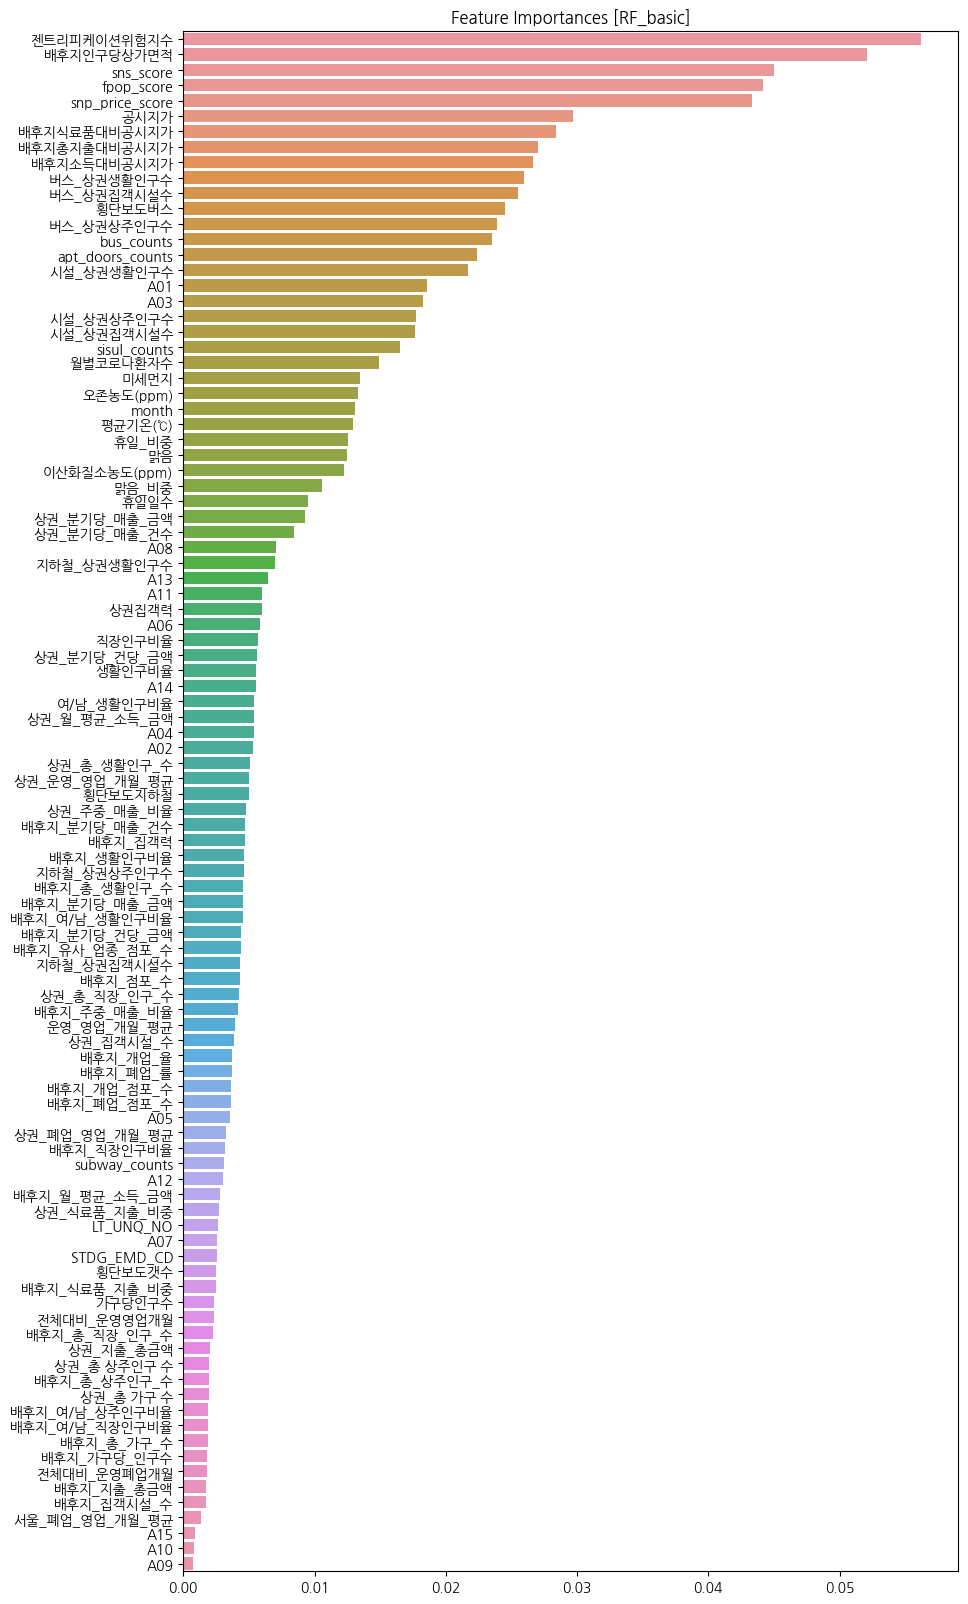

In [106]:
plt.rcParams['font.family'] = 'NanumGothic'

ser = pd.Series(rf_clf.feature_importances_, index = X_train.columns)
# 내림차순 정렬을 이용한다
importances = ser.sort_values(ascending=False)

plt.figure(figsize=(10,20))

plt.title('Feature Importances [RF_basic]')

sns.barplot(x=importances, y=importances.index)

plt.show()

## [4-1] 0.0025 이하 제외

In [107]:
%%time

drop_list = list(importances[importances < 0.0025].index)
X_train_1 = X_train.drop(drop_list, axis = 1)
X_test_1 = X_test.drop(drop_list, axis = 1)


# 모델 로드
rf_clf_1 = RandomForestClassifier(random_state = 7)

rf_clf_1.fit(X_train_1, y_train)

pred_y_1 = rf_clf_1.predict(X_test_1)
pred_y_prob_1 = rf_clf_1.predict_proba(X_test_1)

# randomforest
roc_auc_ovo = roc_auc_score(y_test, pred_y_prob_1, multi_class='ovo')
roc_auc_ovr = roc_auc_score(y_test, pred_y_prob_1, multi_class='ovr')
mse = sum(((pred_y_1)-(y_test))**2) / len(y_test)
print(roc_auc_ovo, roc_auc_ovr, mse)

0.8891567037449054 0.8850177483016 0.6332929656413273
CPU times: total: 14min 25s
Wall time: 14min 27s


In [108]:
print(classification_report(y_test, pred_y_1))

              precision    recall  f1-score   support

           1       0.73      0.66      0.70     28923
           2       0.65      0.70      0.67     72239
           3       0.62      0.65      0.64     86689
           4       0.63      0.64      0.63     72241
           5       0.65      0.48      0.55     28918

    accuracy                           0.64    289010
   macro avg       0.66      0.63      0.64    289010
weighted avg       0.64      0.64      0.64    289010



## [4-2] 0.005 미만 제외

In [109]:
drop_list = list(importances[importances < 0.005].index)
X_train_2 = X_train.drop(drop_list, axis = 1)
X_test_2 = X_test.drop(drop_list, axis = 1)

In [110]:
print(drop_list)

['횡단보도지하철', '상권_주중_매출_비율', '배후지_분기당_매출_건수', '배후지_집객력', '배후지_생활인구비율', '지하철_상권상주인구수', '배후지_총_생활인구_수', '배후지_분기당_매출_금액', '배후지_여/남_생활인구비율', '배후지_분기당_건당_금액', '배후지_유사_업종_점포_수', '지하철_상권집객시설수', '배후지_점포_수', '상권_총_직장_인구_수', '배후지_주중_매출_비율', '운영_영업_개월_평균', '상권_집객시설_수', '배후지_개업_율', '배후지_폐업_률', '배후지_개업_점포_수', '배후지_폐업_점포_수', 'A05', '상권_폐업_영업_개월_평균', '배후지_직장인구비율', 'subway_counts', 'A12', '배후지_월_평균_소득_금액', '상권_식료품_지출_비중', 'LT_UNQ_NO', 'A07', 'STDG_EMD_CD', '횡단보도갯수', '배후지_식료품_지출_비중', '가구당인구수', '전체대비_운영영업개월', '배후지_총_직장_인구_수', '상권_지출_총금액', '상권_총 상주인구 수', '배후지_총_상주인구_수', '상권_총 가구 수', '배후지_여/남_상주인구비율', '배후지_여/남_직장인구비율', '배후지_총_가구_수', '배후지_가구당_인구수', '전체대비_운영폐업개월', '배후지_지출_총금액', '배후지_집객시설_수', '서울_폐업_영업_개월_평균', 'A15', 'A10', 'A09']


In [111]:
%%time

drop_list = list(importances[importances < 0.005].index)
X_train_2 = X_train.drop(drop_list, axis = 1)
X_test_2 = X_test.drop(drop_list, axis = 1)


# 모델 로드
rf_clf_2 = RandomForestClassifier(random_state = 7)

rf_clf_2.fit(X_train_2, y_train)

pred_y_2 = rf_clf_2.predict(X_test_2)
pred_y_prob_2 = rf_clf_2.predict_proba(X_test_2)

# randomforest
roc_auc_ovo = roc_auc_score(y_test, pred_y_prob_2, multi_class='ovo')
roc_auc_ovr = roc_auc_score(y_test, pred_y_prob_2, multi_class='ovr')
mse = sum(((pred_y_2)-(y_test))**2) / len(y_test)
print(roc_auc_ovo, roc_auc_ovr, mse)

0.8938909217210942 0.8899006654799816 0.6093353171170548
CPU times: total: 13min 40s
Wall time: 13min 46s


In [152]:
test_data = test_data.drop(drop_list, axis = 1)

# [5] 모델 테스트

## [5-1] SVM 
-> 학습에 너무 오랜시간 소요

In [45]:
#%%time
#from sklearn.svm import SVC

#y_train_svc = y_train - 1
#y_test_svc = y_test - 1

# SVM 모델 초기화
#svm_classifier = SVC(kernel='rbf', decision_function_shape='ovr')  # 다중 분류를 위한 'ovr' 설정

# SVM 모델 학습
#svm_classifier.fit(X_train_1, y_train_svc)

# 테스트 데이터에 대한 예측
#y_pred_svm = svm_classifier.predict(X_test_1)
#y_pred_prob_svm = svm_classifier.predict_proba(X_test_1)

## [5-2] KNN

In [112]:
from sklearn.neighbors import KNeighborsClassifier

y_train_knn = y_train - 1
y_test_knn = y_test - 1

# KNN 모델 초기화
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# KNN 모델 학습
knn_classifier.fit(X_train_2, y_train_knn)

# 테스트 데이터에 대한 예측
y_pred_knn = knn_classifier.predict(X_test_2)
y_pred_prob_knn = knn_classifier.predict_proba(X_test_2)

In [113]:
roc_auc_ovo = roc_auc_score(y_test, y_pred_prob_knn, multi_class='ovo')
roc_auc_ovr = roc_auc_score(y_test, y_pred_prob_knn, multi_class='ovr')
mse = sum(((y_pred_knn+1)-(y_test))**2) / len(y_test)
print(roc_auc_ovo, roc_auc_ovr, mse)

0.7074959315767299 0.7031407908079239 1.4532334521296841


In [115]:
print(classification_report(y_test, y_pred_knn+1))

              precision    recall  f1-score   support

           1       0.34      0.38      0.36     28923
           2       0.39      0.47      0.42     72239
           3       0.40      0.42      0.41     86689
           4       0.43      0.37      0.40     72241
           5       0.36      0.18      0.24     28918

    accuracy                           0.39    289010
   macro avg       0.38      0.37      0.37    289010
weighted avg       0.39      0.39      0.39    289010



## [5-3] lgbm

In [116]:
import lightgbm as lgb

y_train_lgb = y_train - 1
y_test_lgb = y_test - 1

params = {
    'objective': 'multiclass',
    'num_class': len(set(y_train_lgb)),
    'metric': 'multi_logloss'  # 손실 함수 설정
}

param_grid = {
    'n_estimators': [100, 200],  # 트리의 개수
    'max_depth': [5, 10, 15],  # 트리의 최대 깊이
    'learning_rate': [0.01, 0.1, 0.2],  # 학습률
    'colsample_bytree': [0.7, 0.8],  # 각 트리에서 선택할 특성 비율
}

lgb_clf = lgb.LGBMClassifier(**params)

grid_search = GridSearchCV(estimator=lgb_clf, param_grid=param_grid, 
                           scoring='roc_auc_ovo', cv=2)

grid_search.fit(X_train_2, y_train_lgb)

# 최적의 하이퍼 파라미터 및 성능 출력
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", -grid_search.best_score_)

# 최적 모델 획득
best_model_lgb = grid_search.best_estimator_

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082514 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7693
[LightGBM] [Info] Number of data points in the train set: 433515, number of used features: 49
[LightGBM] [Info] Start training from score -2.301836
[LightGBM] [Info] Start training from score -1.386486
[LightGBM] [Info] Start training from score -1.204130
[LightGBM] [Info] Start training from score -1.386458
[LightGBM] [Info] Start training from score -2.301974
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > n

In [123]:
# 최적 파라미터
grid_search.best_estimator_

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.2, max_depth=15,
               metric='multi_logloss', n_estimators=200, num_class=5,
               objective='multiclass')

In [120]:
pred_y_lgb = best_model_lgb.predict(X_test_2) + 1
pred_y_prob_lgb = best_model_lgb.predict_proba(X_test_2)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [121]:
roc_auc_ovo = roc_auc_score(y_test, pred_y_prob_lgb, multi_class='ovo')
roc_auc_ovr = roc_auc_score(y_test, pred_y_prob_lgb, multi_class='ovr')
mse = sum(((pred_y_lgb)-(y_test))**2) / len(y_test)
print(roc_auc_ovo, roc_auc_ovr, mse)

0.7854061028775303 0.7772484338635537 0.9813605065568666


In [122]:
print(classification_report(y_test, pred_y_lgb))

              precision    recall  f1-score   support

           1       0.61      0.34      0.43     28923
           2       0.46      0.53      0.49     72239
           3       0.44      0.53      0.48     86689
           4       0.47      0.51      0.49     72241
           5       0.64      0.19      0.30     28918

    accuracy                           0.47    289010
   macro avg       0.52      0.42      0.44    289010
weighted avg       0.49      0.47      0.46    289010



## [5-4] XGB

In [32]:
#%%time

#from xgboost import XGBClassifier
#import xgboost as xgb

# 모델 로드
#y_train_xgb = y_train - 1
#y_test_xgb = y_test - 1
#xgb_clf = xgb.XGBClassifier(random_state = 7, objective='multi:softmax', num_class=len(set(y_test_xgb)))

#xgb_clf.fit(X_train_2, y_train_xgb)

#pred_y_xgb = xgb_clf.predict(X_test_2) + 1
#pred_y_prob_xgb = xgb_clf.predict_proba(X_test_2)

CPU times: total: 52min 21s
Wall time: 13min 21s


In [125]:
from xgboost import XGBClassifier
import xgboost as xgb

param_grid = { 
    'max_depth': [5, 10]
}

y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

xgb_clf = xgb.XGBClassifier(random_state = 7, objective='multi:softmax', num_class=len(set(y_test_xgb)))

grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, 
                           scoring='roc_auc_ovo', cv=2, verbose=2)

grid_search.fit(X_train_2, y_train_xgb)

best_model_xgb = grid_search.best_estimator_

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] END ........................................max_depth=5; total time= 4.3min
[CV] END ........................................max_depth=5; total time= 4.7min
[CV] END .......................................max_depth=10; total time=10.9min
[CV] END .......................................max_depth=10; total time=10.8min


KeyboardInterrupt: 

In [ ]:
# 최적 파라미터
#grid_search.best_estimator_

In [ ]:
##best_model_xgb = grid_search.best_estimator_
#pred_y_xgb = best_model_xgb.predict(X_test_2) + 1
#pred_y_prob_xgb = best_model_xgb.predict_proba(X_test_2)

In [ ]:
#roc_auc_ovo = roc_auc_score(y_test, pred_y_prob_xgb, multi_class='ovo')
#roc_auc_ovr = roc_auc_score(y_test, pred_y_prob_xgb, multi_class='ovr')
#mse = sum(((pred_y_xgb)-(y_test))**2) / len(y_test)
#print(roc_auc_ovo, roc_auc_ovr, mse)

0.7555759850237066 0.748667121949827 1.053008546417079


In [ ]:
#print(classification_report(y_test, pred_y_xgb))

              precision    recall  f1-score   support

           1       0.63      0.20      0.30     28923
           2       0.44      0.49      0.46     72239
           3       0.39      0.56      0.46     86689
           4       0.45      0.43      0.44     72241
           5       0.55      0.12      0.19     28918

    accuracy                           0.43    289010
   macro avg       0.49      0.36      0.37    289010
weighted avg       0.46      0.43      0.41    289010



In [33]:
#roc_auc_ovo = roc_auc_score(y_test, pred_y_prob_xgb, multi_class='ovo')
#roc_auc_ovr = roc_auc_score(y_test, pred_y_prob_xgb, multi_class='ovr')
#mse = sum(((pred_y_xgb)-(y_test))**2) / len(y_test)
#print(roc_auc_ovo, roc_auc_ovr, mse)

0.7599694377891497 0.752287500027802 2.1672260475416074


In [34]:
#print(classification_report(y_test, pred_y_xgb))

c:\Users\NT551XCJ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NT551XCJ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.17      0.50      0.26     28923
           2       0.23      0.34      0.27     72239
           3       0.25      0.23      0.24     86689
           4       0.28      0.02      0.05     72241
           5       0.00      0.00      0.00     28918

    accuracy                           0.21    289010
   macro avg       0.16      0.18      0.14    289010
weighted avg       0.22      0.21      0.18    289010



c:\Users\NT551XCJ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NT551XCJ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NT551XCJ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average

## [5-5] CatBoost

In [126]:
%%time
# cb
from catboost import CatBoostClassifier, Pool
y_train_cb = y_train - 1
y_test_cb = y_test - 1

cb_clf = CatBoostClassifier(loss_function='MultiClass')

# 모델 학습
cb_clf.fit(X_train_2, y_train_cb)

# 예측
pred_y_cb = cb_clf.predict(X_test_2) + 1
pred_y_prob_cb = cb_clf.predict_proba(X_test_2)

Learning rate set to 0.111728
0:	learn: 1.5756053	total: 870ms	remaining: 14m 28s
1:	learn: 1.5479153	total: 1.68s	remaining: 13m 58s
2:	learn: 1.5253563	total: 2.42s	remaining: 13m 25s
3:	learn: 1.5064983	total: 3.09s	remaining: 12m 48s
4:	learn: 1.4910525	total: 3.75s	remaining: 12m 26s
5:	learn: 1.4782049	total: 4.56s	remaining: 12m 36s
6:	learn: 1.4669835	total: 5.46s	remaining: 12m 54s
7:	learn: 1.4573995	total: 6.12s	remaining: 12m 39s
8:	learn: 1.4493683	total: 6.77s	remaining: 12m 25s
9:	learn: 1.4424947	total: 7.43s	remaining: 12m 15s
10:	learn: 1.4367185	total: 8.01s	remaining: 11m 59s
11:	learn: 1.4312520	total: 8.71s	remaining: 11m 57s
12:	learn: 1.4268875	total: 9.4s	remaining: 11m 53s
13:	learn: 1.4229913	total: 10s	remaining: 11m 45s
14:	learn: 1.4194502	total: 10.9s	remaining: 11m 54s
15:	learn: 1.4164264	total: 11.6s	remaining: 11m 54s
16:	learn: 1.4138748	total: 12.2s	remaining: 11m 47s
17:	learn: 1.4115613	total: 13s	remaining: 11m 50s
18:	learn: 1.4095060	total: 13.

In [130]:
pred_y_cb = pred_y_cb.reshape(289010,)

In [158]:
pred_y_cb.shape

(289010,)

In [131]:
roc_auc_ovo = roc_auc_score(y_test, pred_y_prob_cb, multi_class='ovo')
roc_auc_ovr = roc_auc_score(y_test, pred_y_prob_cb, multi_class='ovr')
mse = sum(((pred_y_cb)-(y_test))**2) / len(y_test)
print(roc_auc_ovo, roc_auc_ovr, mse)

0.7617235953231931 0.7546006692563175 1.0224352098543303


In [132]:
print(classification_report(y_test, pred_y_cb))

              precision    recall  f1-score   support

           1       0.56      0.25      0.34     28923
           2       0.44      0.50      0.47     72239
           3       0.41      0.52      0.46     86689
           4       0.45      0.49      0.47     72241
           5       0.62      0.11      0.19     28918

    accuracy                           0.44    289010
   macro avg       0.50      0.37      0.39    289010
weighted avg       0.46      0.44      0.43    289010



# [6] Stacking Model 
- RF : pred_y_2
- KNN : y_pred_knn + 1
- lgbm : pred_y_lgb
- xgb : pred_y_xgb
- cbc : pred_y_cbc

In [133]:
pred_y_2

array([2, 4, 2, ..., 3, 3, 5], dtype=int64)

In [134]:
predictions_df = pd.DataFrame({
    'rf': list(pred_y_2), 
    #'xgb': list(pred_y_xgb),  
    'lgb': list(pred_y_lgb),   
    'KNN' : list(y_pred_knn + 1),
    'cbc' : list(pred_y_cb)
})

In [135]:
stacking_y = list(y_test)

In [136]:
# Stacking 모델 내부 Train, test Split (성능확인을 위함)
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(predictions_df, stacking_y, test_size=0.3, random_state=7, stratify = stacking_y)

In [137]:
# RF
rf_clf_st = RandomForestClassifier()
rf_clf_st.fit(X_train_st, y_train_st)

y_pred_rf_st = rf_clf_st.predict(X_test_st)
pred_y_prob_rf_st = rf_clf_st.predict_proba(X_test_st)

In [138]:
roc_auc_ovo = roc_auc_score(y_test_st, pred_y_prob_rf_st, multi_class='ovo')
roc_auc_ovr = roc_auc_score(y_test_st, pred_y_prob_rf_st, multi_class='ovr')
mse = sum(((y_pred_rf_st)-(y_test_st))**2) / len(y_test_st)
print(roc_auc_ovo, roc_auc_ovr, mse)

0.8594347866005663 0.8514441532849452 0.615157491666955


In [139]:
print(classification_report(y_test_st, y_pred_rf_st))

              precision    recall  f1-score   support

           1       0.73      0.68      0.70      8677
           2       0.66      0.70      0.68     21672
           3       0.63      0.66      0.65     26007
           4       0.64      0.65      0.64     21672
           5       0.67      0.48      0.56      8675

    accuracy                           0.65     86703
   macro avg       0.67      0.63      0.65     86703
weighted avg       0.65      0.65      0.65     86703



# [7] 최종 데이터셋 예측

In [153]:
test_data

,bus_counts,sisul_counts,apt_doors_counts,snp_price_score,fpop_score,sns_score,공시지가,이산화질소농도(ppm),오존농도(ppm),미세먼지,...,month,A01,A02,A03,A04,A06,A08,A11,A13,A14
0,11.000000,2.000000,0.000000,72.828750,45.498750,60.072500,7143000.0,0.030,0.017,47.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.000000,2.000000,0.000000,65.298750,53.146250,57.350000,7143000.0,0.028,0.024,44.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11.000000,2.000000,0.000000,72.828750,45.498750,60.072500,7143000.0,0.030,0.017,47.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11.000000,2.000000,0.000000,65.298750,53.146250,57.350000,7143000.0,0.028,0.024,44.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.000000,2.000000,0.000000,65.150000,41.720000,69.940000,7143000.0,0.030,0.017,47.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,20.882353,3.470588,2998.882353,69.691765,53.744706,68.632353,7143000.0,0.024,0.019,47.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,30.444444,5.222222,4367.333333,64.702222,51.927778,60.332222,7143000.0,0.025,0.014,50.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,30.444444,5.222222,4367.333333,70.090000,56.715556,67.444444,7143000.0,0.024,0.019,47.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,22.818182,4.090909,3405.181818,67.876364,54.037273,57.667273,7143000.0,0.025,0.014,50.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
pred_y_cb_f = cb_clf.predict(test_data) + 1
pred_y_cb_f = pred_y_cb_f.reshape(20000,)

In [169]:
pred_y_cb_k = knn_classifier.predict(test_data) + 1
pred_y_cb_l = best_model_lgb.predict(test_data) + 1
pred_y_cb_r = rf_clf_2.predict(test_data)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [177]:
predictions_final_df = pd.DataFrame({
    'rf': list(pred_y_cb_r), 
    #'xgb': list(pred_y_xgb),  
    'lgb': list(pred_y_cb_l),   
    'KNN' : list(pred_y_cb_k),
    'cbc' : list(pred_y_cb_f)
})

In [178]:
final_pred = rf_clf_st.predict(predictions_final_df)
final_pred

array([3, 3, 3, ..., 4, 3, 3])

In [179]:
final_pred.shape

(20000,)

In [183]:
# 최종데이터
final_data = pd.read_excel('C:/Users/NT551XCJ/Desktop/py_projects/ASAC_ML_Project/소상공인 매출등급 예상 대상 필지.xlsx')
final_data.head(5)

,LT_UNQ_NO,INDUSTRY_CD,STDG_EMD_CD,SLS_GRD_2301,SLS_GRD_2302
0,1168010800102090000,A01,11680108,NaN,NaN
1,1135010300106330015,A05,11350103,NaN,NaN
2,1154510200109830004,A02,11545102,NaN,NaN
3,1162010200100920362,A01,11620102,NaN,NaN
4,1168011000104580000,A03,11680110,NaN,NaN


In [189]:
final2301 = final_pred[:10000]
final2302 = final_pred[10000:]

In [191]:
final_data['SLS_GRD_2301'] = final2301
final_data['SLS_GRD_2302'] = final2302

In [193]:
np.sum(final_data['SLS_GRD_2301'] == final_data['SLS_GRD_2302'])

2834

In [196]:
final_data.to_excel("C:/Users/NT551XCJ/Desktop/py_projects/ASAC_ML_Project/소상공인 매출등급 예상 대상 필지_최종예측.xlsx")